In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")

In [ ]:

df=pd.read_csv("/content/drive/MyDrive/MLdev/dispatchbrain/merged_orders_cleaned.csv")



In [ ]:
df.head()

,order_id,assigned,created,delivered,picked,city,service_type,pickup_lat,pickup_lon,drop_lat,...,created_at,promised_at,delivered_at,distance_km,eta_minutes,is_late,pickup_hour,temp_c,rain_mm,wind_kmph
0,O1,2025-07-01 11:16:00,2025-07-01 11:14:00,2025-07-01 11:35:00,2025-07-01 11:25:00,KHI,grocery,24.80302,67.02307,24.848467,...,2025-07-01 11:14:00,2025-07-01 11:44:00,2025-07-01 11:35:00,10.28,21.5,0,2025-07-01 11:00:00,32.9,0.00,13
1,O10,2025-07-01 21:35:00,2025-07-01 21:33:00,2025-07-01 21:38:00,2025-07-01 21:42:00,LHR,food,31.45807,74.31694,31.477321,...,2025-07-01 21:33:00,2025-07-01 22:03:00,2025-07-01 21:38:00,1.89,1.6,0,2025-07-01 21:00:00,24.2,0.00,8
2,O100,2025-07-01 21:24:00,2025-07-01 21:21:00,2025-07-01 21:32:00,2025-07-01 21:32:00,KHI,grocery,24.92562,67.04845,24.971180,...,2025-07-01 21:21:00,2025-07-01 22:01:00,2025-07-01 21:32:00,4.73,11.8,0,2025-07-01 21:00:00,33.6,0.00,5
3,O1000,2025-07-05 17:07:00,2025-07-05 17:05:00,2025-07-05 17:24:00,2025-07-05 17:13:00,ISB,parcel,33.65855,73.02166,33.702327,...,2025-07-05 17:05:00,2025-07-05 17:35:00,2025-07-05 17:24:00,7.81,19.3,0,2025-07-05 17:00:00,28.7,0.63,9
4,O1001,2025-07-06 09:13:00,2025-07-06 09:09:00,2025-07-06 09:14:00,2025-07-06 09:20:00,KHI,grocery,24.91423,67.10443,24.933787,...,2025-07-06 09:09:00,2025-07-06 09:54:00,2025-07-06 09:14:00,1.08,2.3,0,2025-07-06 09:00:00,27.3,0.00,8


In [ ]:
data.shape

(6000, 21)

In [ ]:
data.columns

Index(['order_id', 'assigned', 'created', 'delivered', 'picked', 'city',
       'service_type', 'pickup_lat', 'pickup_lon', 'drop_lat', 'drop_lon',
       'created_at', 'promised_at', 'delivered_at', 'distance_km',
       'eta_minutes', 'is_late', 'pickup_hour', 'temp_c', 'rain_mm',
       'wind_kmph'],
      dtype='object')

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df['distance_km'].fillna(df['distance_km'].median(), inplace=True)
df.dropna(subset=['eta_minutes'], inplace=True)

/tmp/ipython-input-1751428755.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['distance_km'].fillna(df['distance_km'].median(), inplace=True)


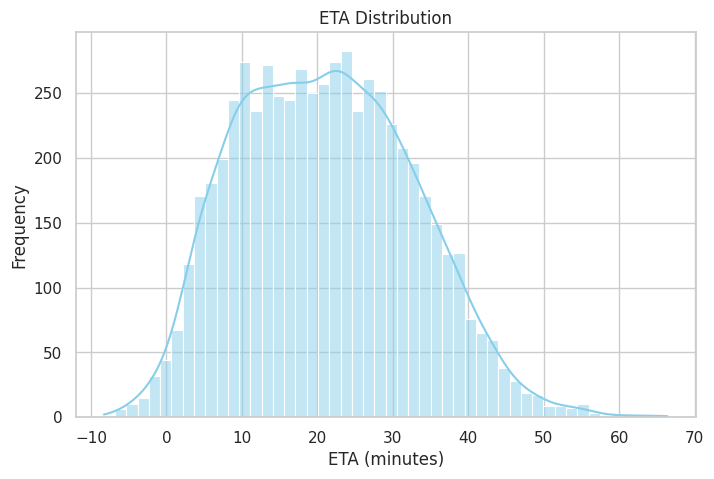

In [ ]:
# ETA Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['eta_minutes'], bins=50, kde=True, color='skyblue')
plt.title("ETA Distribution")
plt.xlabel("ETA (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

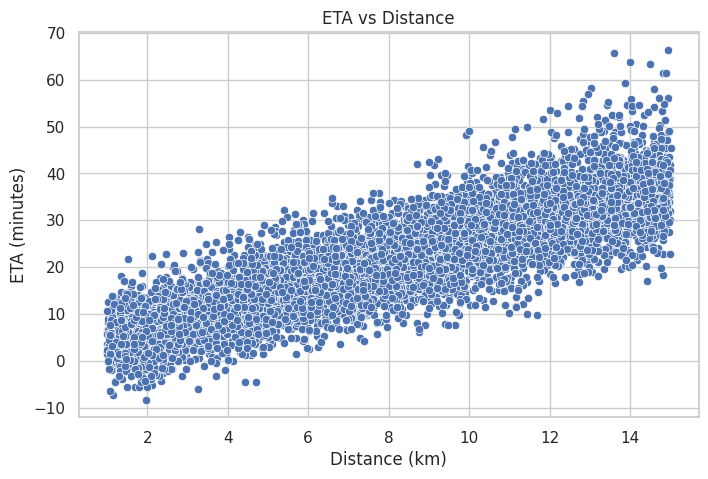

In [ ]:
# ETA vs Distance
plt.figure(figsize=(8, 5))
sns.scatterplot(x='distance_km', y='eta_minutes', data=df)
plt.title("ETA vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("ETA (minutes)")
plt.grid(True)
plt.show()

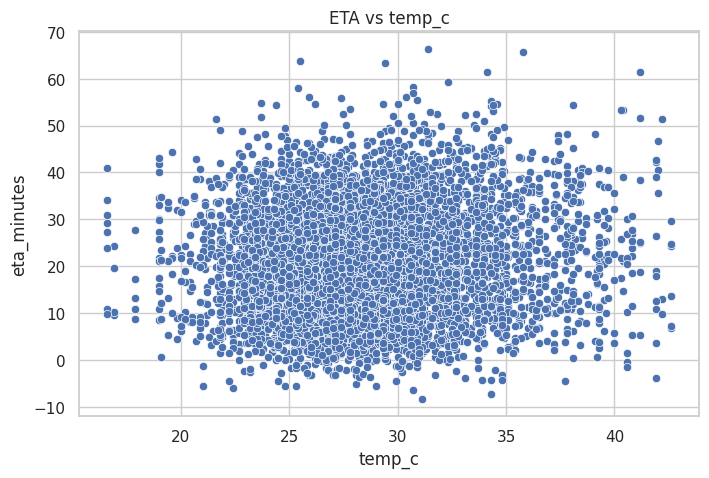

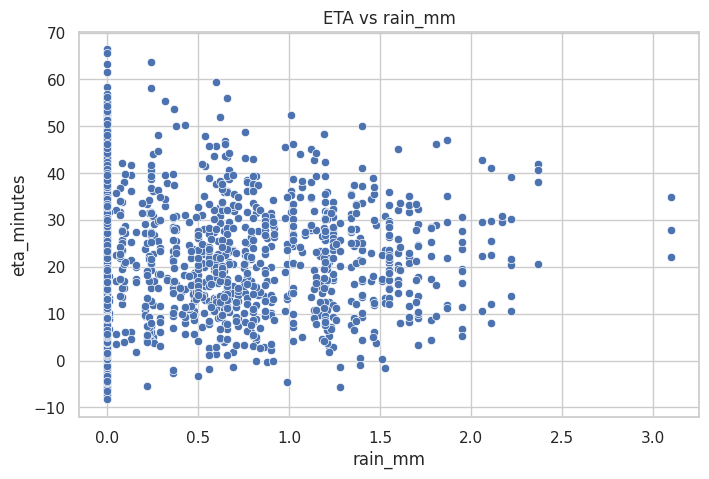

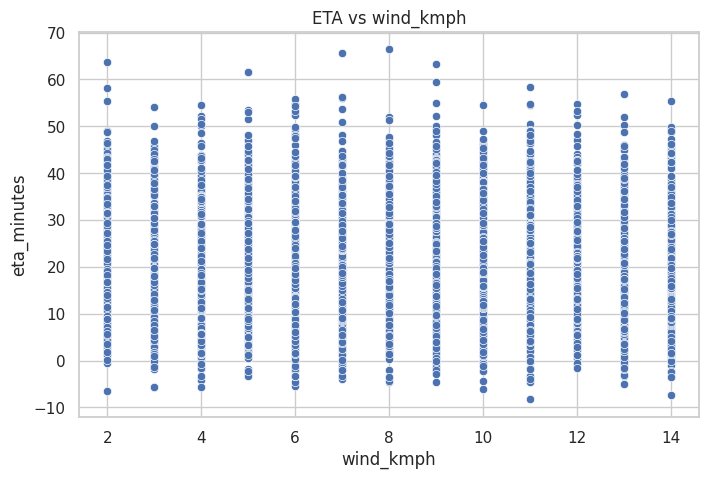

In [ ]:
# Weather Impact on ETA
weather_cols = ['temp_c', 'rain_mm', 'wind_kmph']
for col in weather_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=col, y='eta_minutes', data=df)
        plt.title(f"ETA vs {col}")
        plt.grid(True)
        plt.show()

/tmp/ipython-input-694054512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='eta_minutes', data=df, palette='coolwarm')


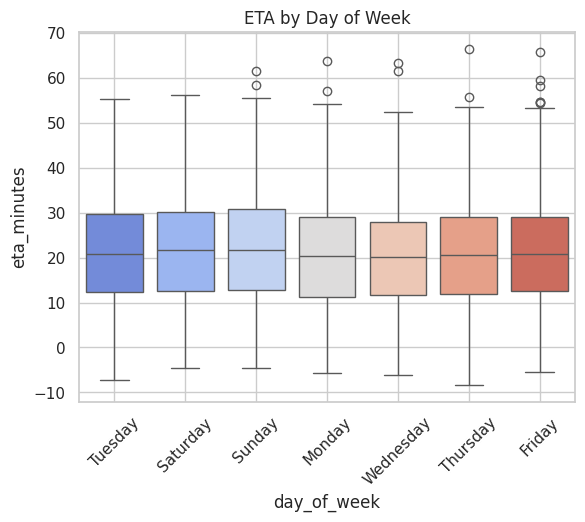

In [ ]:
# Time Features
df['created_at'] = pd.to_datetime(df['created_at'])
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.day_name()

sns.boxplot(x='day_of_week', y='eta_minutes', data=df, palette='coolwarm')
plt.title("ETA by Day of Week")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

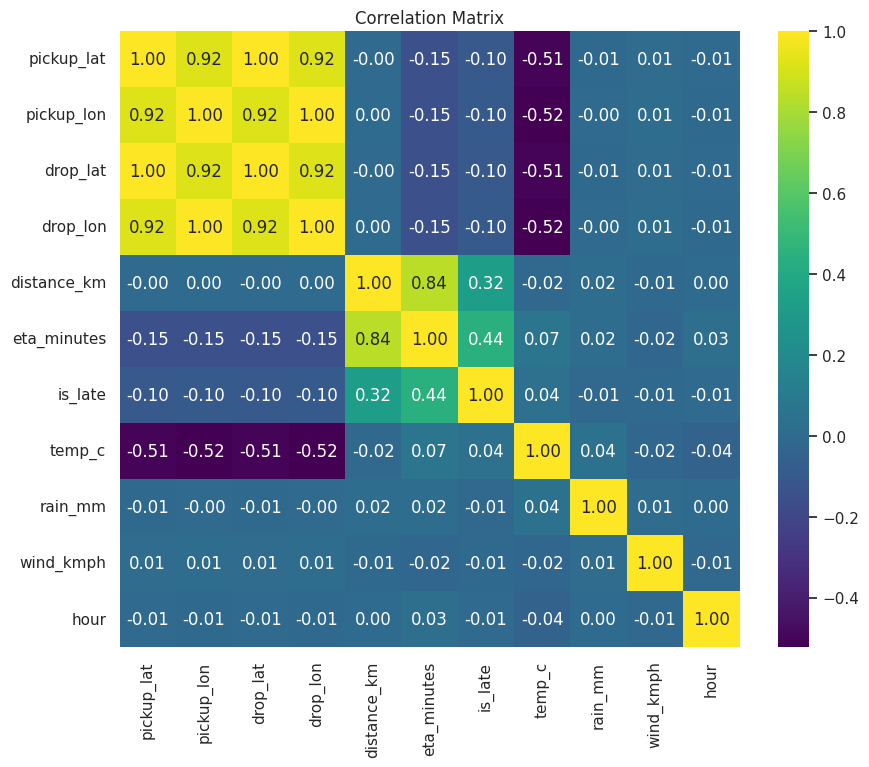

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
import os
os.makedirs('data/processed', exist_ok=True)

In [ ]:
df.to_csv("data/processed/dispatch_eta_cleaned.csv", index=False)